In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob


import random
np.random.seed(1001)
random.seed(1001)

# Create parameters

In [2]:
params = ob.fl_params(num_samples=10000, num_agents=10, size=500)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.fl_agents(params)
g = ob.fl_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 100
memory = [2, 20, 50, max_iter]
memory_bounds = {}
for m in memory:
    print(f"memory = {m}")
    prob.solve(rel_gap=10**(-10), abs_gap=10**(-10), max_iter=max_iter, memory=m, minorant_update='drop_constr', print_freq=10)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

memory = 2
k=0, rel_gap=1.6767373885077049e+21, L=4.133904243507362e-18, U=6931.471805599453, L0=4.133904243507362e-18
k=10, rel_gap=1.5804356388517415, L=405.7485167257124, U=1047.0079329702603, L0=403.10024804993725
k=20, rel_gap=1.0125137675369615, L=520.2488300249757, U=1047.0079329702603, L0=516.4174411915344
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
k=30, rel_gap=0.399739873210

/Users/fangzhaozhang/miniconda3/envs/hw4/lib/python3.8/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
k=50, rel_gap=0.26990427305272, L=745.1050248141277, U=946.2120548845137, L0=745.1050248141277
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
k=60, rel_gap=0.22873569113847853, L=765.8586429657124, U=941.0378489788519, L0=765.8586429657124
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, sw

# Centralized solution

In [5]:
h_cvx = ob.cvx_federated_learning(params=params)[2]

# Plot

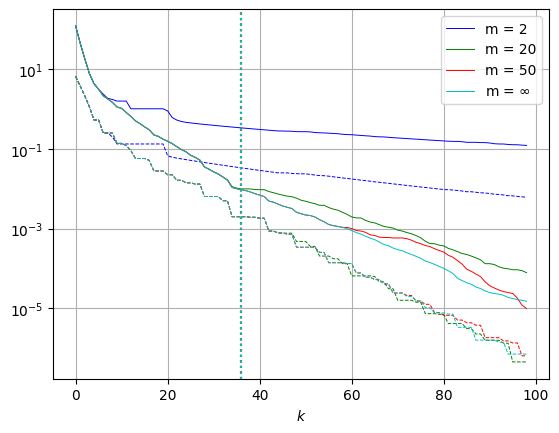

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)